# Imports

In [5]:
import sys
import os
import random
from operator import add, mul
from pyspark import SparkContext, SparkConf
from pyspark import SparkFiles

In [5]:
conf = SparkConf().setAppName()
sc = SparkContext.getOrCreate(conf=conf)

In [6]:
# sc.stop()

In [7]:
# sc = SparkContext.getOrCreate()

In [ ]:
sc.applicationId

# Datasets

In [10]:
AIRPORTS = ('airports.csv')
DATA_STR = "/user/nameartem/file1"

# Creating RDDs

In [ ]:
# Parallelized Collection
data = DATA_STR.split(' ')
print(data)
pcoll = sc.parallelize(data)
pcoll.collect()

In [ ]:
# из RDD
rdd_from_rdd = pcoll.map(lambda word: word.upper())
rdd_from_rdd.collect()

In [ ]:
# из файла
text_file = sc.textFile(AIRPORTS)
text_file.map(lambda line: line.upper()).collect()

# RDD Transformations


### map, filter, flatMap, distinct, sortBy, groupBy

In [ ]:
# map
rdd = sc.textFile(AIRPORTS)
lines = rdd.map(lambda line: line.split(','))
lines.count()

In [ ]:
lines.take(3)

In [ ]:
# filter : избавимся от заголовков
lines = lines.filter(lambda cols: cols[0]!='IATA')
lines.count()

In [ ]:
# flatMap
textFile = sc.textFile(README)

# ВОПРОС: А чем map отличается от flatMap?

words = textFile.flatMap(lambda line: line.split())
words.take(50)

In [ ]:
lines.take(3)

In [ ]:
# distinct
codes = lines.map(lambda cols: cols[0])
print(codes.count())
print(codes.distinct().count())

In [ ]:
# sortBy : сделаем сортировку по records/rows (первая колонка)
lines.sortBy(lambda line: line[1]).take(10)

In [ ]:
# а что тут изменилось?
lines.sortBy(lambda line: line[0], ascending=False).map(lambda line: line[0]).take(10)

In [20]:
words.take(20)

[u'#',
 u'Apache',
 u'Spark',
 u'Spark',
 u'is',
 u'a',
 u'fast',
 u'and',
 u'general',
 u'cluster',
 u'computing',
 u'system',
 u'for',
 u'Big',
 u'Data.',
 u'It',
 u'provides',
 u'high-level',
 u'APIs',
 u'in']

In [21]:
# groupBy
grp = words.groupBy(lambda w : w[0])

print [(k, len(list(v))) for k,v in grp.take(1)]
print [(k, len(list(v))) for k,v in grp.take(10)]

[(u'#', 10)]
[(u'#', 10), (u'-', 2), (u'1', 3), (u'3', 1), (u'A', 6), (u'C', 2), (u'E', 1), (u'G', 2), (u'I', 5), (u'K', 1)]


# Key-Value Pair RDD (PairRDD)

#### keyBy, foldByKey, reduceByKey, groupByKey, lookup, mapValues, collectAsMap, countByKey, sortByKey, sampleByKey

In [22]:
# byKey
keywords = words.keyBy(lambda word: word.lower()[0])
keywords.take(10)

[(u'#', u'#'),
 (u'a', u'Apache'),
 (u's', u'Spark'),
 (u's', u'Spark'),
 (u'i', u'is'),
 (u'a', u'a'),
 (u'f', u'fast'),
 (u'a', u'and'),
 (u'g', u'general'),
 (u'c', u'cluster')]

In [23]:
# foldByKey - значене может быть добавлено к результату.Умножение - 1,0 -сложение
from operator import add, mul
rdd = sc.parallelize([("D1", 30), ("D2", 45), ("D1", 40), ("D2", 40)])
print(rdd.collect())
sorted(rdd.foldByKey(1, mul).collect())

[('D1', 30), ('D2', 45), ('D1', 40), ('D2', 40)]


[('D1', 1200), ('D2', 1800)]

In [24]:
# reduceByKey
rdd = sc.textFile(SAMPLE)
wc = rdd.flatMap(lambda line: line.split(' ')).map(lambda w: (w, 1)) # [('Spark', [1,1,1,1]), ('Python', [1,1,1])]
wc.reduceByKey(lambda a,b: a+b).take(10)

[(u'', 44),
 (u'SparkContext', 1),
 (u'(word,', 1),
 (u'conf', 1),
 (u"'__main__':", 1),
 (u'into', 1),
 (u'wordCounts', 1),
 (u"wordCounts.saveAsTextFile('hdfs:/user/edureka_121039/output1/')", 1),
 (u'#', 3),
 (u'from', 1)]

In [25]:
# groupByKey
word_freq = wc.groupByKey()
print(list((j[0], sum(list(j[1])) ) for j in word_freq.take(10)))

[(u'', 44), (u'SparkContext', 1), (u'(word,', 1), (u'conf', 1), (u'-', 1), (u'into', 1), (u'1)).reduceByKey(lambda', 1), (u'file', 1), (u"wordCounts.saveAsTextFile('hdfs:/user/edureka_121039/output1/')", 1), (u'#', 3)]


**Note:** groupBy и groupByKey самые дорогие операции для вычисления и могу быть поводом для **memory exceptions**

In [26]:
# lookup
keywords.lookup('s')

[u'Spark',
 u'Spark',
 u'system',
 u'Scala,',
 u'supports',
 u'supports',
 u'set',
 u'Spark',
 u'SQL',
 u'SQL',
 u'Spark',
 u'Streaming',
 u'stream',
 u'Spark',
 u'setup',
 u'Spark',
 u'Spark',
 u'Spark',
 u'Spark',
 u'see',
 u'site,',
 u'Spark"](http://spark.apache.org/docs/latest/building-spark.html).',
 u'Spark',
 u'see',
 u'Scala',
 u'Shell',
 u'start',
 u'Spark',
 u'Scala',
 u'shell:',
 u'should',
 u'scala>',
 u'sc.parallelize(1',
 u'Shell',
 u'shell:',
 u'should',
 u'sc.parallelize(range(1000)).count()',
 u'Spark',
 u'several',
 u'sample',
 u'SparkPi',
 u'set',
 u'submit',
 u'spark://',
 u'SparkPi',
 u'Spark](#building-spark).',
 u'Spark',
 u'see',
 u'see',
 u'Spark',
 u'storage',
 u'systems.',
 u'Spark',
 u'same',
 u'Spark.',
 u'Spark',
 u'started']

In [27]:
# mapValues
keywords.mapValues(lambda word: word.upper()).collect()

[(u'#', u'#'),
 (u'a', u'APACHE'),
 (u's', u'SPARK'),
 (u's', u'SPARK'),
 (u'i', u'IS'),
 (u'a', u'A'),
 (u'f', u'FAST'),
 (u'a', u'AND'),
 (u'g', u'GENERAL'),
 (u'c', u'CLUSTER'),
 (u'c', u'COMPUTING'),
 (u's', u'SYSTEM'),
 (u'f', u'FOR'),
 (u'b', u'BIG'),
 (u'd', u'DATA.'),
 (u'i', u'IT'),
 (u'p', u'PROVIDES'),
 (u'h', u'HIGH-LEVEL'),
 (u'a', u'APIS'),
 (u'i', u'IN'),
 (u's', u'SCALA,'),
 (u'j', u'JAVA,'),
 (u'p', u'PYTHON,'),
 (u'a', u'AND'),
 (u'r', u'R,'),
 (u'a', u'AND'),
 (u'a', u'AN'),
 (u'o', u'OPTIMIZED'),
 (u'e', u'ENGINE'),
 (u't', u'THAT'),
 (u's', u'SUPPORTS'),
 (u'g', u'GENERAL'),
 (u'c', u'COMPUTATION'),
 (u'g', u'GRAPHS'),
 (u'f', u'FOR'),
 (u'd', u'DATA'),
 (u'a', u'ANALYSIS.'),
 (u'i', u'IT'),
 (u'a', u'ALSO'),
 (u's', u'SUPPORTS'),
 (u'a', u'A'),
 (u'r', u'RICH'),
 (u's', u'SET'),
 (u'o', u'OF'),
 (u'h', u'HIGHER-LEVEL'),
 (u't', u'TOOLS'),
 (u'i', u'INCLUDING'),
 (u's', u'SPARK'),
 (u's', u'SQL'),
 (u'f', u'FOR'),
 (u's', u'SQL'),
 (u'a', u'AND'),
 (u'd', u'DATAFRA

In [28]:
# collectAsMap
keywords.collectAsMap()

{u'"': u'"local[N]"',
 u'#': u'##',
 u'(': u'(You',
 u'-': u'-T',
 u'.': u'./dev/run-tests',
 u'1': u'1000:',
 u'3': u'3"](https://cwiki.apache.org/confluence/display/MAVEN/Parallel+builds+in+Maven+3).',
 u'<': u'<class>',
 u'>': u'>>>',
 u'[': u'[Contribution',
 u'`': u'`examples`',
 u'a': u'an',
 u'b': u'building',
 u'c': u'contributing',
 u'd': u'documentation',
 u'e': u'example',
 u'f': u'for',
 u'g': u'get',
 u'h': u'how',
 u'i': u'information',
 u'j': u'Java,',
 u'k': u'Kubernetes',
 u'l': u'library',
 u'm': u'must',
 u'n': u'Note',
 u'o': u'on',
 u'p': u'proj',
 u'r': u'review',
 u's': u'started',
 u't': u'the',
 u'u': u'uses',
 u'v': u'Version"](http://spark.apache.org/docs/latest/building-spark.html#specifying-the-hadoop-version)',
 u'w': u'with',
 u'y': u'your'}

In [29]:
# sortByKey
air_ports = sc.textFile(AIRPORTS)
airlines = rdd.map(lambda line: line.split(','))
airlines = lines.filter(lambda cols: cols[0]!='IATA')
pair = airlines.map(lambda line: (line[0], line))
pair.sortByKey().take(10)

[(u'ABE',
  [u'ABE',
   u'Lehigh Valley International',
   u'Allentown',
   u'PA',
   u'USA',
   u'40.65236278',
   u'-75.44040167']),
 (u'ABI',
  [u'ABI',
   u'Abilene Regional',
   u'Abilene',
   u'TX',
   u'USA',
   u'32.41132',
   u'-99.68189722']),
 (u'ABQ',
  [u'ABQ',
   u'Albuquerque International',
   u'Albuquerque',
   u'NM',
   u'USA',
   u'35.0402222',
   u'-106.60919']),
 (u'ABQ',
  [u'ABQ',
   u'Albuquerque International',
   u'Albuquerque',
   u'NM',
   u'USA',
   u'35.0402222',
   u'-106.60919']),
 (u'ABQ',
  [u'ABQ',
   u'Albuquerque International',
   u'Albuquerque',
   u'NM',
   u'USA',
   u'35.04022222',
   u'-106.6091944']),
 (u'ABR',
  [u'ABR',
   u'Aberdeen Regional',
   u'Aberdeen',
   u'SD',
   u'USA',
   u'45.44905556',
   u'-98.42183333']),
 (u'ABY',
  [u'ABY',
   u'Southwest Georgia Regional',
   u'Albany',
   u'GA',
   u'USA',
   u'31.535515',
   u'-84.19447333']),
 (u'ACK',
  [u'ACK',
   u'Nantucket Memorial',
   u'Nantucket',
   u'MA',
   u'USA',
   u'41.2

In [30]:
# countByKey
pair.countByKey()

defaultdict(int,
            {u'ABE': 1,
             u'ABI': 1,
             u'ABQ': 3,
             u'ABR': 1,
             u'ABY': 1,
             u'ACK': 1,
             u'ACT': 1,
             u'ACV': 1,
             u'ACY': 1,
             u'ADK': 1,
             u'ADQ': 1,
             u'AEX': 1,
             u'AGS': 1,
             u'AKN': 1,
             u'ALB': 1,
             u'ALO': 1,
             u'AMA': 1,
             u'ANC': 3,
             u'APN': 1,
             u'ART': 1,
             u'ASE': 1,
             u'ATL': 2,
             u'ATW': 1,
             u'AUS': 2,
             u'AVL': 1,
             u'AVP': 1,
             u'AZO': 1,
             u'BDL': 2,
             u'BET': 1,
             u'BFL': 1,
             u'BGM': 1,
             u'BGR': 1,
             u'BHM': 2,
             u'BIL': 1,
             u'BIS': 1,
             u'BJI': 1,
             u'BLI': 1,
             u'BMI': 1,
             u'BNA': 1,
             u'BOI': 1,
             u'BOS': 1,

In [31]:
# sampleByKey (deterministic(T/F), fraction, seed)
distinctChars = words.flatMap(lambda word: list(word.lower())).distinct().collect()
sampleMap = dict(map(lambda c: (c, random.random()), distinctChars))
words.map(lambda word: (word.lower()[0], word)).sampleByKey(True, sampleMap, 6).collect()

[(u'a', u'Apache'),
 (u'i', u'is'),
 (u'g', u'general'),
 (u'c', u'cluster'),
 (u'p', u'provides'),
 (u'h', u'high-level'),
 (u'h', u'high-level'),
 (u'a', u'APIs'),
 (u'i', u'in'),
 (u'i', u'in'),
 (u'p', u'Python,'),
 (u'p', u'Python,'),
 (u'r', u'R,'),
 (u'o', u'optimized'),
 (u'o', u'optimized'),
 (u'd', u'data'),
 (u'a', u'analysis.'),
 (u'a', u'also'),
 (u'o', u'of'),
 (u'h', u'higher-level'),
 (u'i', u'including'),
 (u's', u'Spark'),
 (u's', u'Spark'),
 (u's', u'SQL'),
 (u'm', u'MLlib'),
 (u'm', u'machine'),
 (u'l', u'learning,'),
 (u'l', u'learning,'),
 (u's', u'Streaming'),
 (u's', u'stream'),
 (u'<', u'<http://spark.apache.org/>'),
 (u'y', u'You'),
 (u'c', u'can'),
 (u'c', u'can'),
 (u'c', u'can'),
 (u'l', u'latest'),
 (u'd', u'documentation,'),
 (u'o', u'on'),
 (u't', u'the'),
 (u'[', u'[project'),
 (u'[', u'[project'),
 (u'p', u'page](http://spark.apache.org/documentation.html).'),
 (u'r', u'README'),
 (u'r', u'README'),
 (u'i', u'instructions.'),
 (u'#', u'##'),
 (u'i', u'

# RDD Functions - Math / Statistical

    min, max, mean, sum, variance, stats

In [32]:
rdd_num = sc.parallelize([9,1,8,7,6,-12,0,84,36,-3])
rdd_num.min(), rdd_num.max(), rdd_num.mean(), rdd_num.sum(), rdd_num.variance(), rdd_num.stdev()

(-12, 84, 13.6, 136, 688.6400000000001, 26.241951146970763)

In [33]:
rdd_num.stats() # returns : count, mean, stdev, max, min

(count: 10, mean: 13.6, stdev: 26.241951146970763, max: 84.0, min: -12.0)

**Note**, функции mean, sum, variance, stdev работают только для числовых данных. Min/Max могу быть выполнены на всех типах: str, int, float и mixed types.

In [34]:
d = sc.parallelize(['a','b',1,2,6,9.0])
d.max(), d.min()

('b', 1)

In [35]:
#d.sum(), d.mean()

In [36]:
d = sc.parallelize([1,2,6,9.0])

# RDD Functions

    intersection, union, join, cartesian, subtract, subtractByKey, leftOuterJoin, rightOuterJoin, fullOuterJoin, cogroup

In [37]:
# intersection
rdd1 = sc.parallelize([1, 10, 2, 3, 4, 5])
rdd2 = sc.parallelize([1, 6, 2, 3, 7, 8])
rdd1.intersection(rdd2).collect()

[1, 2, 3]

In [38]:
# union
rdd1.union(rdd2).distinct().collect()

[8, 4, 1, 5, 10, 2, 6, 3, 7]

In [39]:
# cartesian
cart1 = sc.parallelize([('a',72),('b',42),('a',24)]) # N records
cart2 = sc.parallelize([('b',12),('a',24),('d',12),('e', 30)]) # M records
cart1.cartesian(cart2).count() # N * M records

12

In [40]:
# subtract
print(cart1.subtract(cart2).collect())
print(cart2.subtract(cart1).collect())

[('a', 72), ('b', 42)]
[('e', 30), ('b', 12), ('d', 12)]


In [41]:
# subtractByKey
print(cart1.subtractByKey(cart2).collect())
print(cart2.subtractByKey(cart1).collect())

[]
[('e', 30), ('d', 12)]


In [42]:
# Dataset 1 : k-v pairs
d1 = sc.parallelize([("a", 1), ("b", 4), ("b", 3)])

# Dataset 2 : k-v pairs
d2 = sc.parallelize([("a", 2), ("c", 8), ("a", 3)], 3)

In [43]:
d1.getNumPartitions()

2

In [44]:
d2.getNumPartitions()

3

In [45]:
# join : просто join == inner join 
sorted(d1.join(d2).collect())

[('a', (1, 2)), ('a', (1, 3))]

In [46]:
# leftOuterJoin 
sorted(d1.leftOuterJoin(d2).collect())

[('a', (1, 2)), ('a', (1, 3)), ('b', (3, None)), ('b', (4, None))]

In [47]:
# rightOuterJoin
sorted(d1.rightOuterJoin(d2).collect())

[('a', (1, 2)), ('a', (1, 3)), ('c', (None, 8))]

In [48]:
# fullOuterJoin
sorted(d1.fullOuterJoin(d2).collect())

[('a', (1, 2)),
 ('a', (1, 3)),
 ('b', (3, None)),
 ('b', (4, None)),
 ('c', (None, 8))]

In [49]:
# cogroup: равнозначно FULL OUTER JOIN 
[(a, tuple(map(list, b))) for a, b in sorted(list(d1.cogroup(d2).collect()))]

[('a', ([1], [2, 3])), ('b', ([4, 3], [])), ('c', ([], [8]))]

# RDD Actions

### first, count, collect, take, top, reduce, takeOrdered, countByValue, countByKey

In [50]:
# top : (если результат ожидаемо мал)
rdd_num = sc.parallelize([1, 20, -3, 4, 15])
print(rdd_num.top(3))
words = sc.parallelize(['hello', 'python', 'anaconda', 'hi', 'python', 'anaconda'])
print(words.top(3))
print(words.first())

[20, 15, 4]
['python', 'python', 'hi']
hello


In [51]:
# reduce
rdd_num = sc.parallelize([1, 6, 3, 4, 5])
print(rdd_num.sum())
print(rdd_num.reduce(mul))

19
360


In [52]:
# takeOrdered
rdd_num = sc.parallelize([1, 20, -3, 4, 15])
rdd_num.takeOrdered(4)

[-3, 1, 4, 15]

In [53]:
# countByValue : returns (value, count)
words = sc.parallelize(['hello', 'python', 'anaconda', 'hi', 'python', 'anaconda'])
print(words.countByValue())
sorted(words.countByValue().items())

defaultdict(<type 'int'>, {'python': 2, 'hi': 1, 'hello': 1, 'anaconda': 2})


[('anaconda', 2), ('hello', 1), ('hi', 1), ('python', 2)]

In [54]:
# countByKey
d1 = sc.parallelize([("a", 1), ("b", 4), ("b", 3)], 3)
sorted(d1.countByKey().items())

[('a', 1), ('b', 2)]

# RDD Functions - Дополнение

### countApprox, coalesce, zip, persist, sample, toDebugString, unpersist

In [ ]:
# countApprox(timeout, confidence=0.95)
# примерные count(), возвращает приблизительное кол-во объектов, что быстрее чем считать всё
rdd = sc.parallelize(range(10,1000,10), 10)
print(rdd.count())
print(rdd.countApprox(6, 0.8))
rdd.getNumPartitions()

In [ ]:
# coalesce :возвращает новый RDD с меньшим кол-вом партиции
# coalesce(numPartitions, shuffle=False)

orig = sc.parallelize([1, 2, 3, 4, 5], 3)
new = orig.coalesce(2)

print(orig.glom().collect())
print(new.glom().collect())
new.getNumPartitions()

In [56]:
# zip - объединяет 2 RDDs (одной длины)
words = sc.parallelize(DATA_STR.split(' '))
nums = sc.parallelize(range(words.count()))
print(nums.collect())
words.zip(nums).collect() 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


[('Python', 0),
 ('is', 1),
 ('one', 2),
 ('of', 3),
 ('the', 4),
 ('programming', 5),
 ('languages', 6),
 ('supported', 7),
 ('by', 8),
 ('Apache', 9),
 ('Spark.', 10)]

In [57]:
# persist (указывает, как кэшировать данные)
readme = sc.textFile(README)
readme.cache()
print(readme.is_cached)
readme.unpersist() # MEMORY_ONLY
readme.is_cached

True


False

In [58]:
# sample(withReplacement, fraction, seed=None)
rdd = sc.parallelize(range(1000), 10)
rdd.sample(False, 0.1).count() 

87

In [59]:
# toDebugString : возвращает читаемую строчку конфигурации
words.toDebugString()

'(2) ParallelCollectionRDD[204] at parallelize at PythonRDD.scala:475 []'

In [60]:
# unpersist : удаление объектов из памяти
readme.unpersist()
readme.is_cached

False

# Вечный пример - Word Count

In [61]:
rdd = sc.textFile(README)
wc = rdd.flatMap(lambda line: line.split(' ')) \
        .map(lambda w: (w, 1)) \
        .reduceByKey(lambda a,b: a+b) \
        .map(lambda (a,b): (b,a)) \
        .sortByKey(ascending=False)

# [ ('Spark', 10), ('Apache', 3), ('is', 20) ]
# [ (10, 'Spark'), (3, 'Apache'), (20, 'is') ]

output = wc.collect()

In [62]:
for (count, word) in output:
    print('%s: %i' % (word, count))

: 72
the: 24
to: 17
Spark: 16
for: 12
##: 9
and: 9
a: 9
run: 7
is: 7
on: 7
can: 7
in: 6
also: 5
using: 5
of: 5
including: 4
Please: 4
see: 4
with: 4
You: 4
you: 4
an: 4
if: 4
build: 4
For: 3
use: 3
Hadoop: 3
or: 3
one: 3
general: 3
example: 3
how: 3
documentation: 3
guidance: 2
return: 2
supports: 2
./bin/run-example: 2
This: 2
Hadoop,: 2
building: 2
shell:: 2
following: 2
detailed: 2
tests: 2
1000:: 2
which: 2
Hive: 2
Python: 2
Shell: 2
should: 2
Interactive: 2
do: 2
SQL: 2
refer: 2
set: 2
examples: 2
command,: 2
be: 2
Scala: 2
`examples`: 2
SparkPi: 2
locally: 2
It: 2
that: 2
particular: 2
To: 2
cluster: 2
at: 2
Python,: 2
class: 2
programs: 2
help: 1
-T: 1
Testing: 1
graph: 1
high-level: 1
find: 1
web: 1
Big: 1
run:: 1
module,: 1
given.: 1
directory.: 1
than: 1
get: 1
Many: 1
YARN,: 1
Example: 1
Once: 1
HDFS: 1
Because: 1
name: 1
versions: 1
Streaming: 1
(You: 1
core: 1
thread,: 1
individual: 1
runs.: 1
Pi: 1
More: 1
[Configuration: 1
Versions: 1
integration: 1
test,: 1
Developer: 1

# RDD DAG процесса Word Count в Spark Web

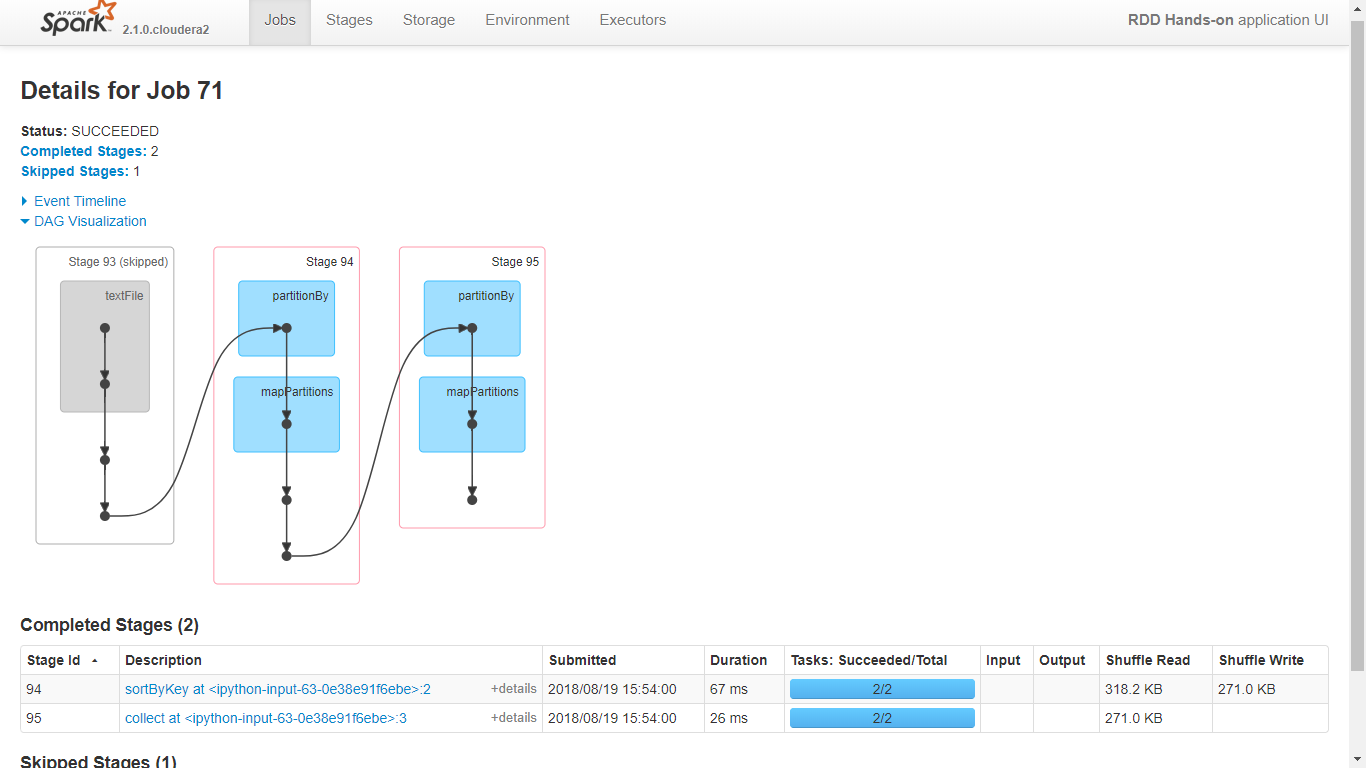